In [ ]:
#Name: Advik Sharma
#Class Roll No.: CSC/20/32
#University Roll No.: 20059570024

#PROGRAM 6: Implement Logistic Regression problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
#loading the csv file
data = pd.read_csv(r"C:\Users\om\Downloads\student_data.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,ParentschoolSatisfaction,Unnamed: 15,Class,sender,subject,body_length,has_attachment,is_reply,is_forward,is_spam
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,...,Good,NaN,M,colleague,discount,5356,0,1,0,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,...,Good,NaN,M,friend,discount,4077,0,1,1,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,...,Bad,NaN,L,friend,offer,4898,0,0,0,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,...,Bad,NaN,L,colleague,meeting,1417,0,0,1,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,...,Bad,NaN,M,colleague,prize,8846,0,0,0,1


In [3]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Unnamed: 15,body_length,has_attachment,is_reply,is_forward,is_spam
count,480.000000,480.000000,480.000000,480.000000,0.0,480.000000,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333,NaN,4983.943750,0.497917,0.512500,0.510417,0.512500
std,30.779223,33.080007,26.611244,27.637735,NaN,2947.144179,0.500517,0.500365,0.500413,0.500365
min,0.000000,0.000000,0.000000,1.000000,NaN,43.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,20.000000,14.000000,20.000000,NaN,2282.250000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,65.000000,33.000000,39.000000,NaN,5126.000000,0.000000,1.000000,1.000000,1.000000
75%,75.000000,84.000000,58.000000,70.000000,NaN,7581.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,99.000000,98.000000,99.000000,NaN,9983.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#Create a LabelEncoder object
encoder = LabelEncoder()

#Encode the features
transform_set = ['gender', 'raisedhands', 'AnnouncementsView', 'Discussion', 'NationalITy', 'PlaceofBirth', 'StageID',
                 'GradeID', 'SectionID', 'Topic', 'Semester', 'Class', 'Relation', 'ParentAnsweringSurvey', 
                'ParentschoolSatisfaction', 'sender', 'subject']
for feature in transform_set:
    data[feature] = encoder.fit_transform(data[feature])
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,ParentschoolSatisfaction,Unnamed: 15,Class,sender,subject,body_length,has_attachment,is_reply,is_forward,is_spam
0,1,4,4,2,1,0,7,0,0,15,...,1,NaN,2,0,0,5356,0,1,0,0
1,1,4,4,2,1,0,7,0,0,20,...,1,NaN,2,1,0,4077,0,1,1,0
2,1,4,4,2,1,0,7,0,0,10,...,0,NaN,1,1,2,4898,0,0,0,1
3,1,4,4,2,1,0,7,0,0,29,...,0,NaN,1,0,1,1417,0,0,1,1
4,1,4,4,2,1,0,7,0,0,35,...,0,NaN,2,0,3,8846,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,3,1,5,0,2,1,0,5,...,0,NaN,1,2,0,4617,1,1,1,1
476,0,3,3,1,5,0,5,0,0,40,...,0,NaN,2,1,3,7069,0,1,0,0
477,0,3,3,1,5,0,5,1,0,44,...,0,NaN,2,1,2,2311,1,0,0,1
478,0,3,3,1,5,0,6,0,0,29,...,0,NaN,1,0,1,789,0,0,0,1


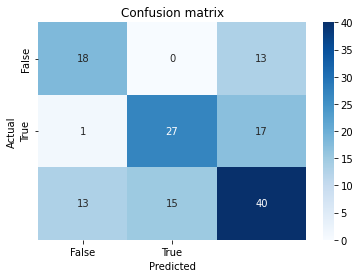

Accuracy=  59.02777777777778 %


In [6]:
# Split the dataset into training and test sets
X = data.iloc[0:, :10]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model to the training data
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data and evaluate the model
y_pred = model.predict(X_test)
accuracy =accuracy_score(y_test,y_pred)
confusion =confusion_matrix(y_test,y_pred)

# Plot the confusion matrix
labels = ['False', 'True']
sns.heatmap(confusion, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

print("Accuracy= ", accuracy*100, "%")

In [7]:
#FOR EMAIL SPAM DETECTOR
data.iloc[0:, 17:].head()

,sender,subject,body_length,has_attachment,is_reply,is_forward,is_spam
0,0,0,5356,0,1,0,0
1,1,0,4077,0,1,1,0
2,1,2,4898,0,0,0,1
3,0,1,1417,0,0,1,1
4,0,3,8846,0,0,0,1


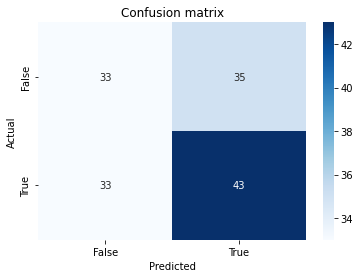

Accuracy=  52.77777777777778 %


In [8]:
X = data.iloc[0:, 17:-1]
y = data['is_spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data and evaluate the model
y_pred = model.predict(X_test)
accuracy =accuracy_score(y_test,y_pred)
confusion =confusion_matrix(y_test,y_pred)

# Plot the confusion matrix
labels = ['False', 'True']
sns.heatmap(confusion, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

print("Accuracy= ", accuracy*100, "%")